In [55]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append(os.environ.get('PATH_OPENSKY'))
from user_eval import get_df_posts 
from news_outlet_eval import get_news_feed, get_posts_from_nos

dotenv.load_dotenv('.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

PATH_RESULTS = os.environ.get('PATH_OPENSKY') + 'results/'
PATH_USER_REPLIES_NEWS = PATH_RESULTS + 'agg_user_replies_news_2.csv'
PATH_USER_REPLIES_NEWS_POSTS = PATH_RESULTS + 'agg_user_replies_news_posts_2.csv'

PATH_FEED_POSTS = PATH_DATA + 'feed_posts/'

COLOR_POSITIVE = os.environ.get('COLOR_POSITIVE')
COLOR_NEUTRAL = os.environ.get('COLOR_NEUTRAL')
COLOR_NEGATIVE = os.environ.get('COLOR_NEGATIVE')

df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)

/tmp/ipykernel_1894031/2558602318.py:27: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)


In [56]:
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657080,284413,bsky.social,2024-01-14 08:03:00,let’s hope his expands ten fold 💪💪,['eng'],0,0,0,10657081.0,15717.0,10657081.0,15717.0,NaN,NaN,NaN,NaN,NaN,2.0,0.945
1,10657084,284413,bsky.social,2024-01-12 22:12:00,"yes, we can do this! 💪",['eng'],3,0,0,5595208.0,2486.0,5595208.0,2486.0,NaN,NaN,NaN,NaN,NaN,2.0,0.956
2,10657085,284413,bsky.social,2024-01-11 14:19:00,"in other words, “as long as it takes” it refer...",['eng'],0,1,0,10657086.0,12030.0,10657086.0,12030.0,NaN,NaN,NaN,NaN,NaN,1.0,0.583
3,10657096,284413,bsky.social,2024-01-08 14:10:00,i’ll believe it when i see the weapons in Ukra...,['eng'],0,0,0,10657097.0,15717.0,10657097.0,15717.0,NaN,NaN,NaN,NaN,NaN,1.0,0.509
4,10657117,284413,bsky.social,2024-01-05 09:22:00,Expect the world to become way way worse. If a...,['eng'],1,0,0,5271912.0,15717.0,5271912.0,15717.0,NaN,NaN,NaN,NaN,NaN,0.0,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36816,171050451,141248,bsky.social,2024-03-09 13:47:00,La preuve qu'ils sont antidémocratiques. \nPer...,"['eng', 'fra']",4,0,0,5550653.0,4890.0,5550653.0,4890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36817,105014318,92560,bsky.social,2024-03-08 01:59:00,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.790
36818,105014322,92560,bsky.social,2024-03-07 22:16:00,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.867
36819,105014501,92560,bsky.social,2024-01-05 08:08:00,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.882


In [57]:
bm_first_depth = (df.reply_to == df.thread_root)
df = df[bm_first_depth]
df.dropna(subset=['sent_label'], inplace=True)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Set 'date_column' as the index
df.set_index('date', inplace=True)
df = df[df.index > pd.to_datetime('2023-09-15')]

# Sort the DataFrame by the index to ensure it's monotonic
df.sort_index(inplace=True)

sent_label_mapping = { 0: 'negative', 1: 'neutral', 2: 'positive'}
df.loc[:, 'sent_label'] = df.sent_label.map(sent_label_mapping)
df

/tmp/ipykernel_1894031/844590454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['sent_label'], inplace=True)
/tmp/ipykernel_1894031/844590454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/tmp/ipykernel_1894031/844590454.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['negative' 'negative' 'negative' ... 'neutral' 'positive' 'positive']' has dtype incompatible with float64, please explicitly cast to a 

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2023-09-15 00:59:00,4199854,1038138,bsky.social,Not so much a joke as a prediction,['eng'],0,0,0,175973.0,114.0,175973.0,114.0,NaN,NaN,NaN,NaN,NaN,negative,0.494
2023-09-15 01:11:00,103226912,962353,bsky.social,"That it’s baseless political bullshit, meant t...",['eng'],0,0,0,21937059.0,379.0,21937059.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.866
2023-09-15 04:12:00,135652163,2951670,bsky.social,Yawn MAO,['eng'],1,0,0,3060895.0,319.0,3060895.0,319.0,NaN,NaN,NaN,NaN,NaN,negative,0.489
2023-09-15 04:48:00,133153960,34207,bsky.social,Not only do you hit us with the paywall you do...,['eng'],0,0,0,73980826.0,12030.0,73980826.0,12030.0,NaN,NaN,NaN,NaN,NaN,negative,0.934
2023-09-15 05:36:00,231011305,185474,holiday,Shawn Fain?\nNow the corporations have gone an...,['eng'],0,0,0,27716567.0,273835.0,27716567.0,273835.0,NaN,NaN,NaN,NaN,NaN,negative,0.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 23:44:00,177355488,357175,bsky.social,"They knew it was deadly long ago!\nIn 1900, a ...",['eng'],2,1,2,10705540.0,9.0,10705540.0,9.0,77830213.0,2089172.0,NaN,NaN,NaN,negative,0.834
2024-03-18 23:44:00,77830213,2089172,bsky.social,"They knew it was deadly long ago!\nIn 1900, a ...",['eng'],2,1,2,10705540.0,9.0,10705540.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.834
2024-03-18 23:45:00,70495008,152971,bsky.social,Gotta catch ‘em all!,['eng'],2,1,0,3753243.0,379.0,3753243.0,379.0,NaN,NaN,NaN,NaN,NaN,neutral,0.549


In [58]:
resample_frequency = 'D'  # Change this to 'T' for minutes, 'S' for seconds, etc.
df_resampled = df.groupby('sent_label').resample(resample_frequency).size().unstack(fill_value=0)
df_sent_labels = df_resampled.T#.reset_index().set_
df_sent_labels.loc[:, 'total'] = df_sent_labels.sum(axis=1)
df_sent_labels.loc[:, 'negative'] = df_sent_labels.negative / df_sent_labels.total    
df_sent_labels.loc[:, 'neutral'] = df_sent_labels.neutral / df_sent_labels.total
df_sent_labels.loc[:, 'positive'] = df_sent_labels.positive / df_sent_labels.total
#df_sent_labels.drop(columns=['total'], inplace=True)
df_sent_labels

/tmp/ipykernel_1894031/524164055.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88235294 0.76923077 0.63636364 0.58791209 0.33333333 0.35185185
 0.58461538 0.47222222 0.54166667 0.47058824 0.5483871  0.5
 0.63636364 0.62711864 0.55357143 0.59090909 0.55555556 0.4375
 0.53846154 0.5        0.60483871 0.58024691 0.67647059 0.59259259
 0.47272727 0.58208955 0.52380952 0.62921348 0.63       0.53125
 0.61904762 0.5        0.65891473 0.59541985 0.74468085 0.5308642
 0.78021978 0.65306122 0.6119403  0.36363636 0.58461538 0.54
 0.71428571 0.48101266 0.69642857 0.475      0.52857143 0.61290323
 0.57142857 0.76119403 0.6969697  0.71052632 0.72108844 0.56666667
 0.4789916  0.54945055 0.575      0.44444444 0.44117647 0.6
 0.4939759  0.78723404 0.61290323 0.59405941 0.45833333 0.46067416
 0.5        0.60606061 0.48       0.66666667 0.64285714 0.68181818
 0.47619048 0.46808511 0.55555556 0.70212766 0.50980392 0.52272727


sent_label,negative,neutral,positive,total
date,,,,
2023-09-15,0.882353,0.058824,0.058824,17
2023-09-16,0.769231,0.230769,0.000000,13
2023-09-17,0.636364,0.363636,0.000000,11
2023-09-18,0.587912,0.307692,0.104396,182
2023-09-19,0.333333,0.481481,0.185185,27
...,...,...,...,...
2024-03-14,0.515000,0.375000,0.110000,200
2024-03-15,0.631579,0.279352,0.089069,247
2024-03-16,0.678571,0.178571,0.142857,84


Text(0, 0.5, 'Total Count')

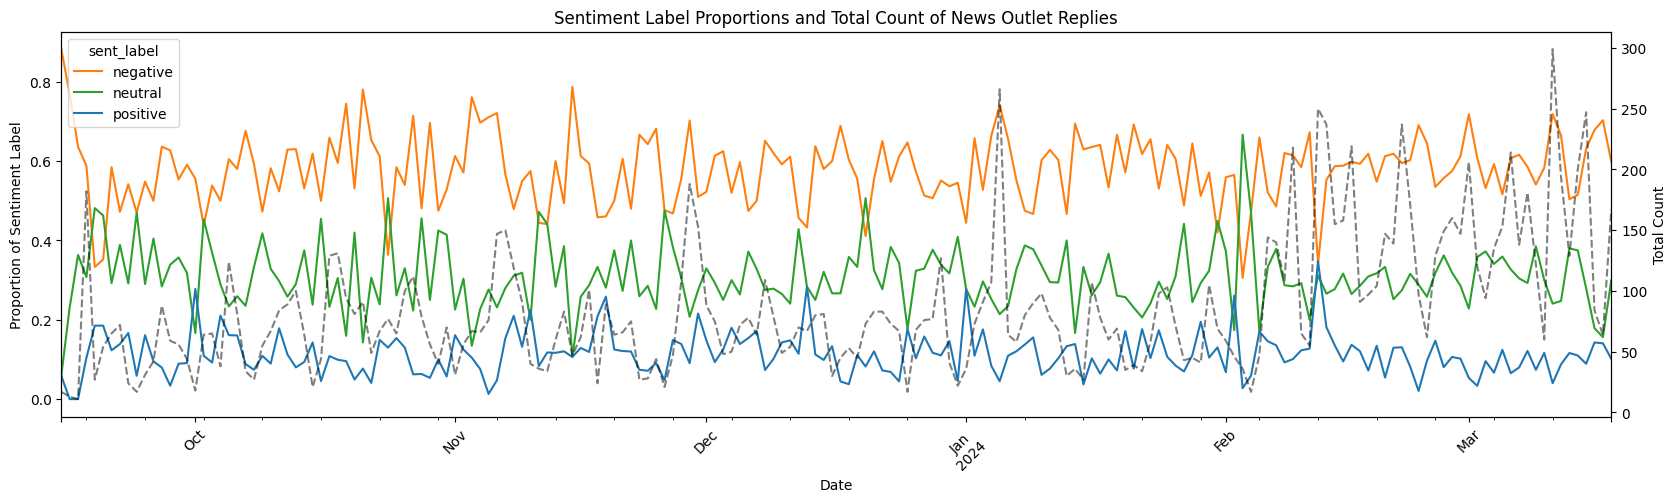

In [59]:
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot the proportions on the primary y-axis
df_sent_labels.drop(columns='total').plot(ax=ax1, color=[COLOR_NEGATIVE, COLOR_NEUTRAL, COLOR_POSITIVE])
ax1.set_ylabel('Proportion of Sentiment Label')
ax1.set_xlabel('Date')
ax1.set_title('Sentiment Label Proportions and Total Count of News Outlet Replies')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the total count on the secondary y-axis
df_sent_labels.total.plot(ax=ax2, color='black', linestyle='--', alpha=0.5)
ax2.set_ylabel('Total Count')

In [30]:
date_first_peak = df_sent_labels[df_sent_labels.total > 240].index[0].date()
date_second_peak = df_sent_labels[df_sent_labels.total > 240].index[1].date()
date_third_peak = df_sent_labels[df_sent_labels.total > 240].index[2].date()
date_fourth_peak = df_sent_labels[df_sent_labels.total > 240].index[3].date()

def get_posts_of_date(date):
    return df[df.index.to_series().apply(lambda x: x.date()) == date]

df_sent_labels[df_sent_labels.total > 240]

sent_label,negative,neutral,positive,total
date,,,,
2024-01-05,0.740602,0.214286,0.045113,266
2024-02-12,0.340000,0.312000,0.348000,250
2024-03-11,0.719064,0.240803,0.040134,299
2024-03-15,0.631579,0.279352,0.089069,247


In [31]:
df_posts_first_peak = get_posts_of_date(date_first_peak)
df_posts_first_peak.groupby('thread_root').size().sort_values(ascending=False).head(5)

thread_root
83904.0      180
145655.0      19
4358575.0     10
2277139.0      6
5384654.0      5
dtype: int64

In [45]:
df_news_feed = get_news_feed()
df_news_feed 

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,quotes,quoted_author,labels
0,3517724,27155,com,2023-10-20 11:25:00,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,None,None,None
1,3517724,27155,com,2023-10-20 11:25:00,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,None,None,None
2,3517724,27155,com,2023-10-20 11:25:00,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,None,None,None
3,73976085,12030,com,2024-03-14 06:30:00,The low end consumer is still struggling\n\nht...,None,0,0,0,NaN,NaN,NaN,NaN,None,None,None
4,3517724,27155,com,2023-10-20 11:25:00,📍 Welcome to 📰 News! Please hit Like ❤️ above ...,[eng],2799,46,104,NaN,NaN,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42107,70869659,319,com,2023-06-27 13:00:00,Tuesday briefing:\n\n- Vladimir Putin spoke fo...,None,18,0,3,NaN,NaN,NaN,NaN,None,None,None
42108,2974,319,com,2023-06-26 15:29:00,"no for real, no paywall on our articles until ...",None,78,0,50,1233314.0,319.0,1233314.0,319.0,None,None,None
42109,44325423,319,com,2023-06-21 18:43:00,Florida Gov. Ron DeSantis’s wealthy donors and...,None,19,6,6,NaN,NaN,NaN,NaN,None,None,None
42110,112720429,319,com,2023-06-21 13:25:00,Wednesday briefing:\n\n - Underwater noises we...,None,32,2,6,NaN,NaN,NaN,NaN,None,None,None


In [54]:
df_news_feed.loc[df_news_feed.post_id == 83904, 'text'].values[0]

'Despite calls from politicians for her resignation, Sally Kornbluth, the president of MIT, has avoided a concerted effort to bring down her presidency after testifying in a tense congressional hearing last month on antisemitism.'

In [62]:
get_posts_of_date(date_first_peak)

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2024-01-05 00:07:00,168420686,2100137,bsky.social,Joe Biden is a War Criminal,['eng'],5,0,0,145950.0,16202.0,145950.0,16202.0,NaN,NaN,NaN,NaN,NaN,negative,0.931
2024-01-05 00:12:00,24956150,37163,bsky.social,Schrodinger's ethnic cleansing,['eng'],10,0,0,145950.0,16202.0,145950.0,16202.0,NaN,NaN,NaN,NaN,NaN,negative,0.734
2024-01-05 00:15:00,152327930,185919,bsky.social,@@171734 is relying heavily here on the trope ...,['eng'],0,1,0,20551370.0,5221.0,20551370.0,5221.0,NaN,NaN,NaN,NaN,NaN,neutral,0.620
2024-01-05 00:29:00,47958203,96988,bsky.social,"We need to fire MAGA Mike, MT Greene, Lauren B...",['eng'],0,0,0,30449669.0,2486.0,30449669.0,2486.0,NaN,NaN,NaN,NaN,NaN,negative,0.845
2024-01-05 00:45:00,140392506,32179,bsky.social,Is he trying to make people refuse to vote? Be...,['eng'],11,1,0,145950.0,16202.0,145950.0,16202.0,NaN,NaN,NaN,NaN,NaN,negative,0.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 23:36:00,57423465,119752,bsky.social,"I guess you’ll fix that, won’t you?",['eng'],3,0,0,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.492
2024-01-05 23:40:00,126889546,667202,bsky.social,What is wrong with you? Go report on genocide!,['eng'],1,0,0,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.943
2024-01-05 23:45:00,147012239,763430,bsky.social,"Seriously, why are you publishing this kind of...",['eng'],2,0,0,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.956


In [63]:
df_posts_first_peak = get_posts_of_date(date_first_peak)
df_posts_first_peak = df_posts_first_peak[df_posts_first_peak.thread_root == 83904]
df_posts_first_peak

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2024-01-05 19:01:00,853976,1231464,bsky.social,Rufo hasn’t given you your marching orders on ...,['eng'],147,1,1,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,neutral,0.723
2024-01-05 19:02:00,196385907,3382,bsky.social,"Please, continue with your college president f...",['eng'],41,1,1,83904.0,379.0,83904.0,379.0,184880446.0,868065.0,NaN,NaN,NaN,neutral,0.698
2024-01-05 19:02:00,21660745,251853,bsky.social,"Well, maybe if the New York Times keeps workin...",['eng'],106,0,2,83904.0,379.0,83904.0,379.0,21660746.0,2321.0,NaN,NaN,NaN,negative,0.686
2024-01-05 19:02:00,196385908,3382,bsky.social,"Well, maybe if the New York Times keeps workin...",['eng'],106,0,2,83904.0,379.0,83904.0,379.0,21660746.0,2321.0,NaN,NaN,NaN,negative,0.686
2024-01-05 19:03:00,196385906,3382,bsky.social,"""In doing so, she is denying us at the Times o...",['eng'],89,1,3,83904.0,379.0,83904.0,379.0,704344.0,174993.0,NaN,NaN,NaN,negative,0.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 23:27:00,111003260,66429,bsky.social,Jesus fucking Christ you dumbasses.,['eng'],1,0,0,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.921
2024-01-05 23:36:00,57423465,119752,bsky.social,"I guess you’ll fix that, won’t you?",['eng'],3,0,0,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.492
2024-01-05 23:40:00,126889546,667202,bsky.social,What is wrong with you? Go report on genocide!,['eng'],1,0,0,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.943


In [68]:
df_posts_first_peak.to_csv(PATH_RESULTS + 'replies_first_peak.csv')

In [36]:
df_posts_second_peak = get_posts_of_date(date_second_peak)
df_posts_second_peak.groupby('thread_root').size().sort_values(ascending=False).head(5)

thread_root
134087.0      106
11979118.0     11
134090.0        8
1156983.0       8
700683.0        8
dtype: int64

In [64]:
df_posts_second_peak = get_posts_of_date(date_second_peak)
df_posts_second_peak = df_posts_second_peak[df_posts_second_peak.thread_root == 134087.0]
df_posts_second_peak

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2024-02-12 17:55:00,189874752,674173,bsky.social,Glad to see you here. Welcome!,['eng'],31,0,1,134087.0,9.0,134087.0,9.0,NaN,NaN,NaN,NaN,NaN,positive,0.988
2024-02-12 17:56:00,115361616,32837,bsky.social,Better get skeeting,['eng'],48,0,1,134087.0,9.0,134087.0,9.0,NaN,NaN,NaN,NaN,NaN,neutral,0.531
2024-02-12 17:56:00,86567336,638866,bsky.social,Bout time yall showed up.,['eng'],14,1,1,134087.0,9.0,134087.0,9.0,86567337.0,346980.0,NaN,NaN,NaN,neutral,0.590
2024-02-12 17:56:00,124313509,66361,bsky.social,NPR! Have you done a segment on gooning yet? I...,['eng'],81,2,6,134087.0,9.0,134087.0,9.0,124313510.0,424.0,NaN,NaN,NaN,neutral,0.487
2024-02-12 17:58:00,62418985,710323,bsky.social,Welcome!\n\nI've been following this account f...,['eng'],17,1,1,134087.0,9.0,134087.0,9.0,NaN,NaN,NaN,NaN,NaN,positive,0.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12 22:40:00,184599522,2786416,bsky.social,Glad to have you!!,['eng'],0,0,0,134087.0,9.0,134087.0,9.0,NaN,NaN,NaN,NaN,NaN,positive,0.988
2024-02-12 22:41:00,9847477,2092177,bsky.social,Meee tooo!!,['eng'],0,0,0,134087.0,9.0,134087.0,9.0,NaN,NaN,NaN,NaN,NaN,positive,0.819
2024-02-12 22:56:00,2550516,659085,bsky.social,Welcome. Just try not to be as antisemitic as ...,['eng'],0,0,0,134087.0,9.0,134087.0,9.0,NaN,NaN,NaN,NaN,NaN,neutral,0.543


In [69]:
df_posts_second_peak.to_csv(PATH_RESULTS + 'replies_second_peak.csv')

In [44]:
df_news_feed.loc[df_news_feed.post_id == 134087, 'text']

Series([], Name: text, dtype: object)

In [52]:
df_posts_third_peak = get_posts_of_date(date_third_peak)
df_posts_third_peak

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2024-03-11 00:49:00,199722955,217194,bsky.social,Update: News agencies recall image of Catherin...,['eng'],3,1,2,19766578.0,67361.0,19766578.0,67361.0,19766577.0,67361.0,NaN,NaN,NaN,neutral,0.520
2024-03-11 01:02:00,95156299,82275,bsky.social,bsky.app/profile/chad...,['eng'],0,0,0,26082880.0,319.0,26082880.0,319.0,NaN,NaN,NaN,NaN,NaN,neutral,0.887
2024-03-11 01:02:00,95156297,82275,bsky.social,bsky.app/profile/chad...,['eng'],0,0,0,20047607.0,9.0,20047607.0,9.0,NaN,NaN,NaN,NaN,NaN,neutral,0.887
2024-03-11 01:02:00,95156298,82275,bsky.social,bsky.app/profile/chad...,['eng'],0,0,0,26082878.0,319.0,26082878.0,319.0,NaN,NaN,NaN,NaN,NaN,neutral,0.887
2024-03-11 01:02:00,95156300,82275,bsky.social,bsky.app/profile/chad...,['eng'],0,0,0,11978866.0,319.0,11978866.0,319.0,NaN,NaN,3900409.0,23851.0,NaN,neutral,0.887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11 23:08:00,103602787,873475,bsky.social,Evil landlords come in all ships and sizes.,['eng'],3,0,0,39658224.0,9.0,39658224.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.904
2024-03-11 23:10:00,224071425,1035728,bsky.social,"What a load of self-indulgent crap, bravo, NPR",['eng'],1,0,0,126715.0,9.0,126715.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.931
2024-03-11 23:35:00,46059354,27962,bsky.social,🤔🤨 \nwww.thegauntlet.news/p/disabled-p...,['eng'],8,0,0,126715.0,9.0,126715.0,9.0,NaN,NaN,NaN,NaN,NaN,neutral,0.819


In [ ]:
df_posts_third_peak.groupby('thread_root').size().sort_values(ascending=False).head(5)

In [66]:
df_posts_third_peak = get_posts_of_date(date_third_peak)
df_posts_third_peak = df_posts_third_peak[df_posts_third_peak.thread_root == 126715]
df_posts_third_peak

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2024-03-11 17:40:00,32042844,46753,bsky.social,ok now the husband writes one,['eng'],535,2,10,126715.0,9.0,126715.0,9.0,29039323.0,31638.0,NaN,NaN,NaN,neutral,0.852
2024-03-11 17:40:00,33817938,85863,bsky.social,ok now the husband writes one,['eng'],535,2,10,126715.0,9.0,126715.0,9.0,29039323.0,31638.0,NaN,NaN,NaN,neutral,0.852
2024-03-11 17:40:00,197183799,261506,bsky.social,ok now the husband writes one,['eng'],535,2,10,126715.0,9.0,126715.0,9.0,29039323.0,31638.0,NaN,NaN,NaN,neutral,0.852
2024-03-11 17:44:00,133438639,606775,bsky.social,fuck you NPR,['eng'],357,5,12,126715.0,9.0,126715.0,9.0,4439096.0,64829.0,NaN,NaN,NaN,negative,0.895
2024-03-11 17:44:00,4439095,471887,bsky.social,fuck you NPR,['eng'],357,5,12,126715.0,9.0,126715.0,9.0,4439096.0,64829.0,NaN,NaN,NaN,negative,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11 23:05:00,32042722,46753,bsky.social,"NPR, please rethink your whole thing here, inc...",['eng'],14,0,4,126715.0,9.0,126715.0,9.0,32042723.0,94527.0,NaN,NaN,NaN,negative,0.897
2024-03-11 23:05:00,47011391,68724,bsky.social,"NPR, please rethink your whole thing here, inc...",['eng'],14,0,4,126715.0,9.0,126715.0,9.0,32042723.0,94527.0,NaN,NaN,NaN,negative,0.897
2024-03-11 23:10:00,224071425,1035728,bsky.social,"What a load of self-indulgent crap, bravo, NPR",['eng'],1,0,0,126715.0,9.0,126715.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.931


In [70]:
df_posts_third_peak.to_csv(PATH_RESULTS + 'replies_third_peak.csv')

In [48]:
df_news_feed.loc[df_news_feed.post_id == 126715, 'text'].values[0]

"After a few months, his symptoms went away, but his fears of getting COVID didn't. He is immunocompromised and his doctors warned him that if he got sick again, it may complicate his autoimmune disease. Plus, he didn't want to repeat his traumatic ordeal, especially with a baby on the way."

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2024-01-05 19:01:00,853976,1231464,bsky.social,Rufo hasn’t given you your marching orders on ...,['eng'],147,1,1,83904.0,379.0,83904.0,379.0,NaN,NaN,NaN,NaN,NaN,neutral,0.723
2024-01-05 19:02:00,196385907,3382,bsky.social,"Please, continue with your college president f...",['eng'],41,1,1,83904.0,379.0,83904.0,379.0,184880446.0,868065.0,NaN,NaN,NaN,neutral,0.698
2024-01-05 19:02:00,21660745,251853,bsky.social,"Well, maybe if the New York Times keeps workin...",['eng'],106,0,2,83904.0,379.0,83904.0,379.0,21660746.0,2321.0,NaN,NaN,NaN,negative,0.686
2024-01-05 19:02:00,196385908,3382,bsky.social,"Well, maybe if the New York Times keeps workin...",['eng'],106,0,2,83904.0,379.0,83904.0,379.0,21660746.0,2321.0,NaN,NaN,NaN,negative,0.686
2024-01-05 19:03:00,196385906,3382,bsky.social,"""In doing so, she is denying us at the Times o...",['eng'],89,1,3,83904.0,379.0,83904.0,379.0,704344.0,174993.0,NaN,NaN,NaN,negative,0.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11 23:05:00,32042722,46753,bsky.social,"NPR, please rethink your whole thing here, inc...",['eng'],14,0,4,126715.0,9.0,126715.0,9.0,32042723.0,94527.0,NaN,NaN,NaN,negative,0.897
2024-03-11 23:05:00,47011391,68724,bsky.social,"NPR, please rethink your whole thing here, inc...",['eng'],14,0,4,126715.0,9.0,126715.0,9.0,32042723.0,94527.0,NaN,NaN,NaN,negative,0.897
2024-03-11 23:10:00,224071425,1035728,bsky.social,"What a load of self-indulgent crap, bravo, NPR",['eng'],1,0,0,126715.0,9.0,126715.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.931
